In [ ]:
# basic CNN model
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaac000o","key":"2c1a236c98c03c0ce703259671092452"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d legendahmed/alzheimermridataset

 53% 33.0M/61.8M [00:01<00:04, 6.42MB/s]
100% 61.8M/61.8M [00:01<00:00, 33.8MB/s]


In [ ]:
from zipfile import ZipFile
filename = "alzheimermridataset.zip"

with ZipFile(filename,'r') as zip:
  print("Extracting of the file ...")
  zip.extractall()
  print("Done")

Extracting of the file ...
Done


In [ ]:
#libraries 
from imutils import paths
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.optimizers import Adam, SGD


Number of Images: 5121


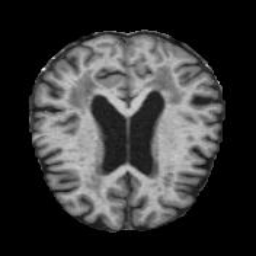

In [ ]:
Training_images_paths = list(paths.list_images("/content/Alzheimer_s Dataset/train"))
Training_labels = []
Training_images = []

i = 0 
while i < len(Training_images_paths):
  Training_labels.append(Training_images_paths[i].split("/")[4])
  image = cv2.imread(Training_images_paths[i])
  image = cv2.resize(image,(256,256))
  Training_images.append(image)
  i = i + 1



print("Number of Images:",len(Training_labels))
cv2_imshow(Training_images[0])






Number of Images: 1279


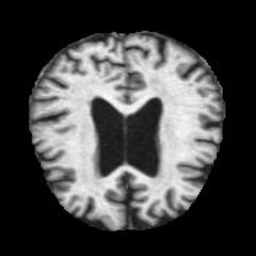

In [ ]:
Testing_images_paths = list(paths.list_images("/content/Alzheimer_s Dataset/test"))
Testing_labels = []
Testing_images = []

i = 0 
while i < len(Testing_images_paths):
  Testing_labels.append(Testing_images_paths[i].split("/")[4])
  image = cv2.imread(Testing_images_paths[i])
  image = cv2.resize(image,(256,256))
  Testing_images.append(image)
  i = i + 1



print("Number of Images:",len(Testing_labels))
cv2_imshow(Testing_images[0])


In [ ]:
Validation_labels = Training_labels[0:100]  + Training_labels[1793:1893]  + Training_labels[2510:2561] + Training_labels[2562:2662]
Validation_images = Training_images[0:100] + Training_images[1793:1893]  + Training_images[2510:2561] + Training_images[2562:2662]



In [ ]:

Training_images_np = np.array(Training_images) 
Training_labels_np = np.array(Training_labels)

Testing_images_np = np.array(Testing_images) 
Testing_labels_np = np.array(Testing_labels)

Validation_images_np = np.array(Validation_images)
Validation_labels_np = np.array(Validation_labels)


In [ ]:

i = 0 
while i <len(Training_images):
  image = Training_images[i]
  image = cv2.resize(image,(128,128))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  Training_images[i] = image
  i = i + 1


n = 0 
while n < len(Testing_images):
  image = Testing_images[n]
  image = cv2.resize(image,(128,128))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  Testing_images[n] = image
  n = n + 1

n = 0 
while n < len(Validation_images):
  image = Validation_images[n]
  image = cv2.resize(image,(128,128))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  Validation_images[n] = image
  n = n + 1

print(type(Training_images))
Training_images = np.array(Training_images)
Testing_images = np.array(Testing_images)
Validation_images= np.array(Validation_images)
print(type(Training_images))


Training_images = Training_images/255.00
Testing_images = Testing_images/255.00
Validation_images = Validation_images/255.00
label_encoder = LabelEncoder()

Training_labels = label_encoder.fit_transform(Training_labels)
print(Training_labels.shape)

label_encoder = LabelEncoder()
Testing_labels = label_encoder.fit_transform(Testing_labels)
print(Testing_labels.shape)


label_encoder = LabelEncoder()
Validation_labels = label_encoder.fit_transform(Validation_labels)
print(Validation_labels.shape)

Training_labels = to_categorical(Training_labels)
Testing_labels = to_categorical(Testing_labels)
Validation_labels = to_categorical(Validation_labels)


Training_images = np.expand_dims(Training_images, axis=-1)
Testing_images = np.expand_dims(Testing_images, axis=-1)
Validation_images = np.expand_dims(Validation_images, axis=-1)

print(Training_images.shape)
print(Training_labels.shape)
print(Testing_images.shape)
print(Testing_labels.shape)

print(Validation_images.shape)
print(Validation_labels.shape)

<class 'list'>
<class 'numpy.ndarray'>
(5121,)
(1279,)
(351,)
(5121, 128, 128, 1)
(5121, 4)
(1279, 128, 128, 1)
(1279, 4)
(351, 128, 128, 1)
(351, 4)


In [ ]:
def Alzheimer_Disease(input_shape=(128, 128, 1)):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu'))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))

    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu'))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu'))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))

    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu'))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model= Alzheimer_Disease(input_shape=(128, 128, 1))
model.summary()

hist_ = model.fit(Training_images, Training_labels, batch_size=128, epochs=200, validation_data=(Validation_images, Validation_labels))



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 40, 40, 128)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0

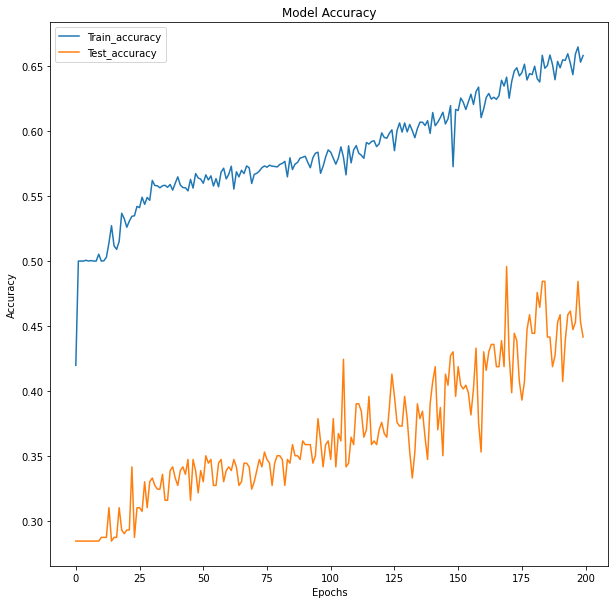

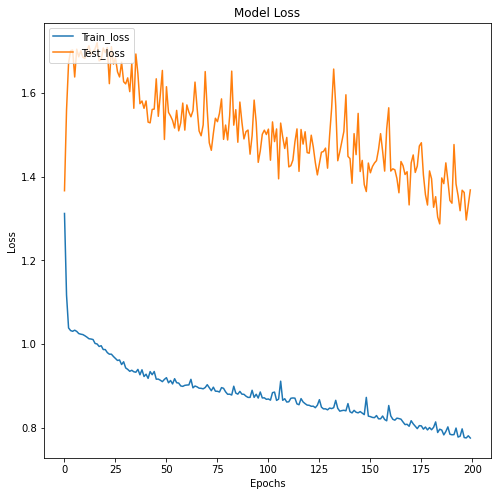

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       179
           1       0.00      0.00      0.00        12
           2       0.60      0.83      0.69       640
           3       0.45      0.40      0.42       448

    accuracy                           0.55      1279
   macro avg       0.26      0.31      0.28      1279
weighted avg       0.46      0.55      0.49      1279



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['accuracy'], label='Train_accuracy')
plt.plot(hist_.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(8, 8))
plt.plot(hist_.history['loss'], label='Train_loss')
plt.plot(hist_.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

from sklearn.metrics import classification_report

ypred = model.predict(Testing_images)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(Testing_labels, axis=1)
print(classification_report(y_test_pred, ypred))

In [ ]:
test_loss, test_acc = model.evaluate(Testing_images, Testing_labels)
print('test_acc:', test_acc)

40/40 [==============================] - 0s 11ms/step - loss: 1.0075 - accuracy: 0.5520
test_acc: 0.551993727684021
